# Lab 2: EDA on Corpora

![](../figs/deep_nlp/lab/eda.png)

## Prepare the environment

In [ ]:
%pip install --pre ekorpkit[dataset]

In [1]:
%config InlineBackend.figure_format='retina'
%load_ext autotime

from ekorpkit import eKonf

eKonf.setLogger("INFO")
print("version:", eKonf.__version__)

is_colab = eKonf.is_colab()
print("is colab?", is_colab)
if is_colab:
    eKonf.mount_google_drive()
workspace_dir = "/content/drive/MyDrive/workspace"
project_name = "ekorpkit-book"
project_dir = eKonf.set_workspace(workspace=workspace_dir, project=project_name)
print("project_dir:", project_dir)

INFO:ekorpkit.utils.notebook:Google Colab not detected.
INFO:ekorpkit.base:Setting EKORPKIT_WORKSPACE_ROOT to /content/drive/MyDrive/workspace
INFO:ekorpkit.base:Setting EKORPKIT_PROJECT to ekorpkit-book
INFO:ekorpkit.base:Loaded .env from /workspace/projects/ekorpkit-book/config/.env


version: 0.1.40.post0.dev21
is colab? False
project_dir: /content/drive/MyDrive/workspace/projects/ekorpkit-book
time: 1.39 s (started: 2022-11-16 23:58:16 +00:00)


## Load the saved corpora

In [2]:
data = eKonf.load_data("wiki_corpus.parquet", project_dir + "/data")

INFO:ekorpkit.io.file:Processing [1] files from ['wiki_corpus.parquet']
INFO:ekorpkit.io.file:Loading 1 dataframes from ['/content/drive/MyDrive/workspace/projects/ekorpkit-book/data/wiki_corpus.parquet']
INFO:ekorpkit.io.file:Loading data from /content/drive/MyDrive/workspace/projects/ekorpkit-book/data/wiki_corpus.parquet


time: 14 s (started: 2022-11-17 00:04:02 +00:00)


In [3]:
data.head()

,id,text,split,filename,corpus
0,4915400,,train,wiki_92,enwiki_sampled
1,7644961,Anaissini is a tribe of click beetles in the f...,train,wiki_49,enwiki_sampled
2,6658552,The Vicky Metcalf Award for Literature for You...,train,wiki_24,enwiki_sampled
3,16385169,Shri Shivabalayogi Maharaj (24 January 1935 – ...,train,wiki_36,enwiki_sampled
4,11081255,Eylex Films Pvt is a chain of multiplex and si...,train,wiki_94,enwiki_sampled


time: 10.2 ms (started: 2022-11-17 00:04:17 +00:00)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2522593 entries, 0 to 2522592
Data columns (total 5 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   id        int64 
 1   text      object
 2   split     object
 3   filename  object
 4   corpus    object
dtypes: int64(1), object(4)
memory usage: 96.2+ MB
time: 3.92 ms (started: 2022-11-17 00:04:18 +00:00)


## Basic statistics

In [6]:
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize
import seaborn as sns

nltk.download("punkt")

# Character counts
data["num_chars"] = data["text"].map(lambda x: len(x))
# Word counts
data["num_words"] = data["text"].map(lambda x: len(x.split()))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


time: 16.6 s (started: 2022-11-17 00:05:26 +00:00)


In [8]:
# format pandas display options
import pandas as pd

pd.options.display.float_format = "{:.0f}".format

# min, max, mean, median, iqr, std
data[["num_chars", "num_words"]].describe()

,num_chars,num_words
count,2522593,2522593
mean,541,93
std,2308,387
min,0,0
25%,0,0
50%,0,0
75%,213,40
max,264937,45338


time: 182 ms (started: 2022-11-17 00:05:51 +00:00)


In [9]:
# filter out outliers

data_filtered = data[data.num_words.between(10, 250)]

time: 72.8 ms (started: 2022-11-17 00:06:07 +00:00)


In [10]:
# save filtered data

eKonf.save_data(data_filtered, "wiki_filtered.parquet", project_dir + "/data")

INFO:ekorpkit.io.file:Saving dataframe to /content/drive/MyDrive/workspace/projects/ekorpkit-book/data/wiki_filtered.parquet


time: 43.4 s (started: 2022-11-17 00:06:22 +00:00)


In [11]:
data_filtered[["num_chars", "num_words"]].describe()

,num_chars,num_words
count,686161,686161
mean,419,75
std,373,63
min,25,10
25%,124,23
50%,283,52
75%,612,112
max,3432,250


time: 47.9 ms (started: 2022-11-17 00:07:07 +00:00)


<AxesSubplot:xlabel='num_chars', ylabel='Count'>

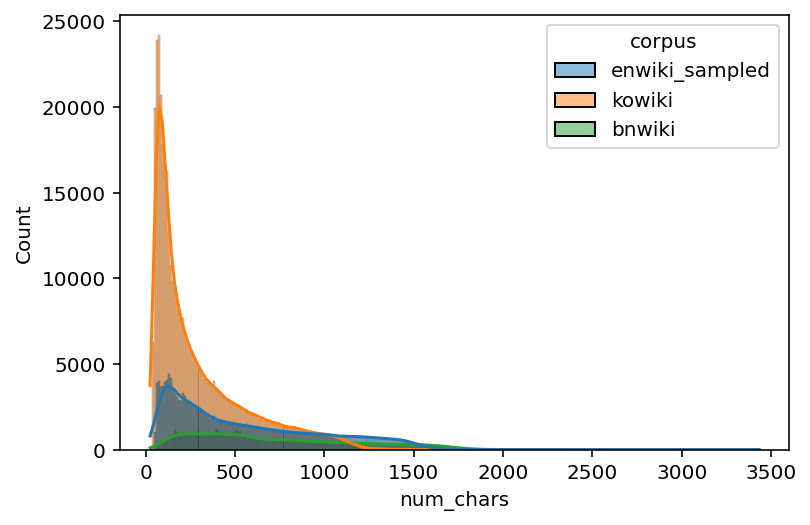

time: 5.31 s (started: 2022-11-17 00:07:16 +00:00)


In [12]:
# Histogram
sns.histplot(data=data_filtered, x="num_chars", hue="corpus", kde=True)

<AxesSubplot:xlabel='num_words', ylabel='Count'>

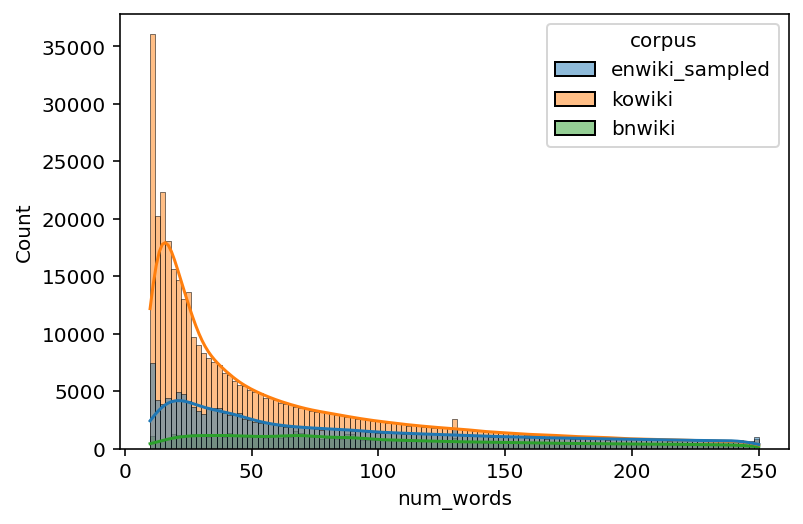

time: 3.56 s (started: 2022-11-17 00:07:30 +00:00)


In [13]:
# Histogram
sns.histplot(data=data_filtered, x="num_words", hue="corpus", kde=True)

In [14]:
# Sentence counts
data_filtered["num_sents"] = data_filtered["text"].map(lambda x: len(sent_tokenize(x)))

time: 1min 23s (started: 2022-11-17 00:07:52 +00:00)


<AxesSubplot:xlabel='num_sents', ylabel='Count'>

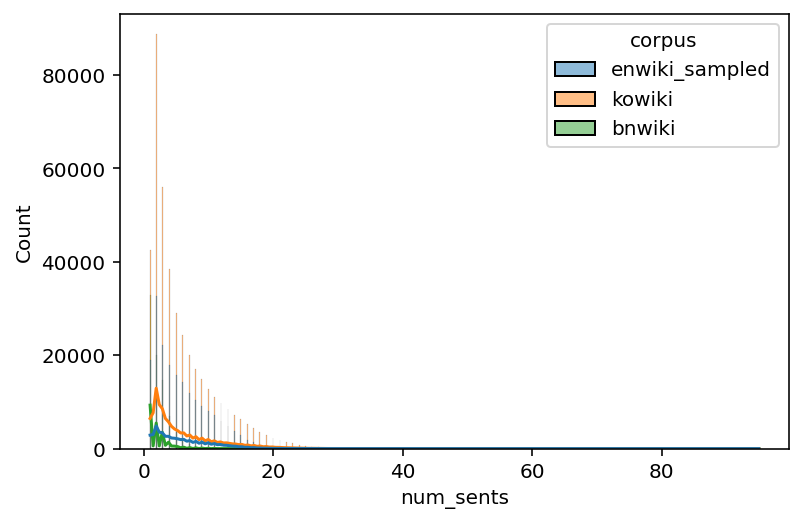

time: 7.1 s (started: 2022-11-17 00:09:23 +00:00)


In [15]:
# Histogram
sns.histplot(data=data_filtered, x="num_sents", hue="corpus", kde=True)

In [17]:
# Average number of characters per word
data_filtered["avg_num_chars"] = data_filtered["num_chars"] / data_filtered["num_words"]

time: 3.14 ms (started: 2022-11-17 00:09:50 +00:00)


<AxesSubplot:xlabel='avg_num_chars', ylabel='Count'>

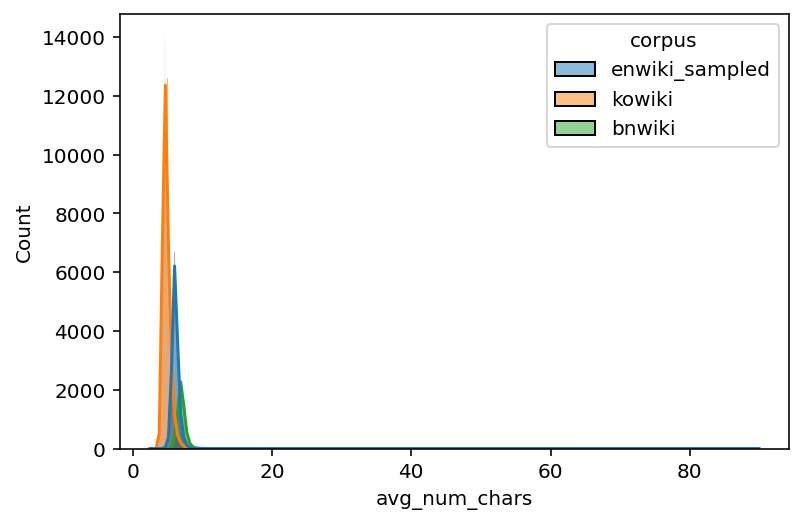

time: 15.2 s (started: 2022-11-17 00:09:59 +00:00)


In [18]:
# Histogram
sns.histplot(data = data_filtered, x = "avg_num_chars", hue = "corpus", kde = True)

In [20]:
# Average number of words per sentence
data_filtered["avg_num_words"] = data_filtered["num_words"] / data_filtered["num_sents"]

time: 3.35 ms (started: 2022-11-17 00:10:20 +00:00)


<AxesSubplot:xlabel='avg_num_words', ylabel='Count'>

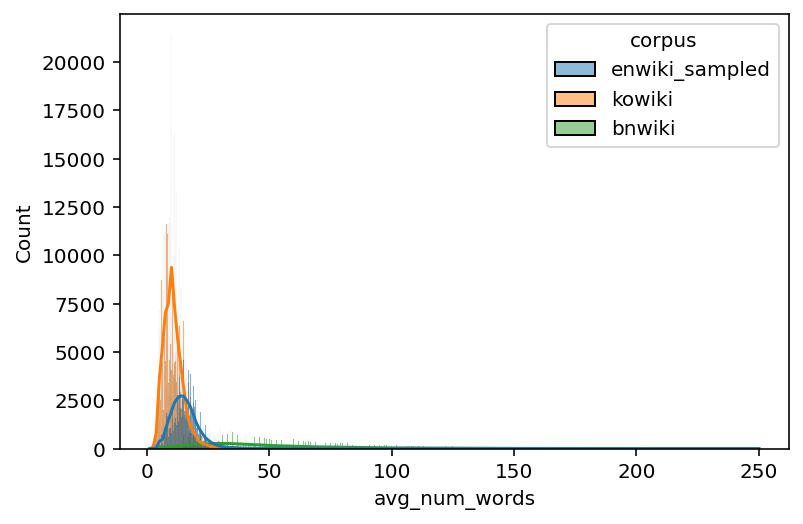

time: 9.77 s (started: 2022-11-17 00:10:24 +00:00)


In [21]:
# Histogram
sns.histplot(data=data_filtered, x="avg_num_words", hue="corpus", kde=True)

## Term Frequency Analysis

In [22]:
# lower case
data_filtered["text"] = data_filtered["text"].map(lambda x: x.lower())

time: 1.05 s (started: 2022-11-17 00:11:01 +00:00)


In [24]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 686161 entries, 1 to 2522592
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             686161 non-null  int64  
 1   text           686161 non-null  object 
 2   split          686161 non-null  object 
 3   filename       686161 non-null  object 
 4   corpus         686161 non-null  object 
 5   num_chars      686161 non-null  int64  
 6   num_words      686161 non-null  int64  
 7   num_sents      686161 non-null  int64  
 8   avg_num_chars  686161 non-null  float64
 9   avg_num_words  686161 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 73.7+ MB
time: 180 ms (started: 2022-11-17 00:11:09 +00:00)


In [47]:
# get all words of english and korean corpus

words_en = sum(
    data_filtered[data_filtered.corpus == "enwiki_sampled"].sample(frac=0.05)["text"]
    .str.split()
    .tolist(),
    [],
)

time: 37.2 s (started: 2022-11-17 00:25:33 +00:00)


In [48]:
words_ko = sum(
    data_filtered[data_filtered.corpus == "kowiki"].sample(frac=0.05)["text"]
    .str.split()
    .tolist(),
    [],
)

time: 2min 57s (started: 2022-11-17 00:26:10 +00:00)


In [49]:
words_bn = sum(
    data_filtered[data_filtered.corpus == "bnwiki"].sample(frac=0.05)["text"]
    .str.split()
    .tolist(),
    [],
)

time: 10.3 s (started: 2022-11-17 00:29:07 +00:00)


In [50]:
from collections import Counter

counter_en = Counter([w for w in words_en if len(w) > 1])
counter_ko = Counter([w for w in words_ko if len(w) > 1])
counter_bn = Counter([w for w in words_bn if len(w) > 1])

time: 600 ms (started: 2022-11-17 00:29:17 +00:00)


In [51]:
# top 10 words in English corpus

counter_en.most_common(10)

[('the', 59104),
 ('in', 29667),
 ('of', 29325),
 ('and', 22730),
 ('is', 15395),
 ('was', 13092),
 ('to', 11893),
 ('on', 7179),
 ('by', 6649),
 ('he', 6566)]

time: 18.6 ms (started: 2022-11-17 00:29:18 +00:00)


In [52]:
# top 10 words in Korean corpus

counter_ko.most_common(10)

[('있다.', 12127),
 ('있는', 4757),
 (')는', 2526),
 ('한다.', 2231),
 ('또는', 2115),
 ('대한민국의', 2048),
 ('이후', 2032),
 ('그는', 2007),
 ('되었다.', 1895),
 ('함께', 1764)]

time: 51.7 ms (started: 2022-11-17 00:29:18 +00:00)


In [53]:
# top 10 words in Bengali corpus

counter_bn.most_common(10)

[('এবং', 6827),
 ('তিনি', 4330),
 ('একটি', 3915),
 ('সালে', 3190),
 ('এই', 3122),
 ('থেকে', 2805),
 ('হয়।', 2594),
 ('তার', 2426),
 ('করা', 2318),
 ('এর', 2252)]

time: 13.1 ms (started: 2022-11-17 00:29:18 +00:00)


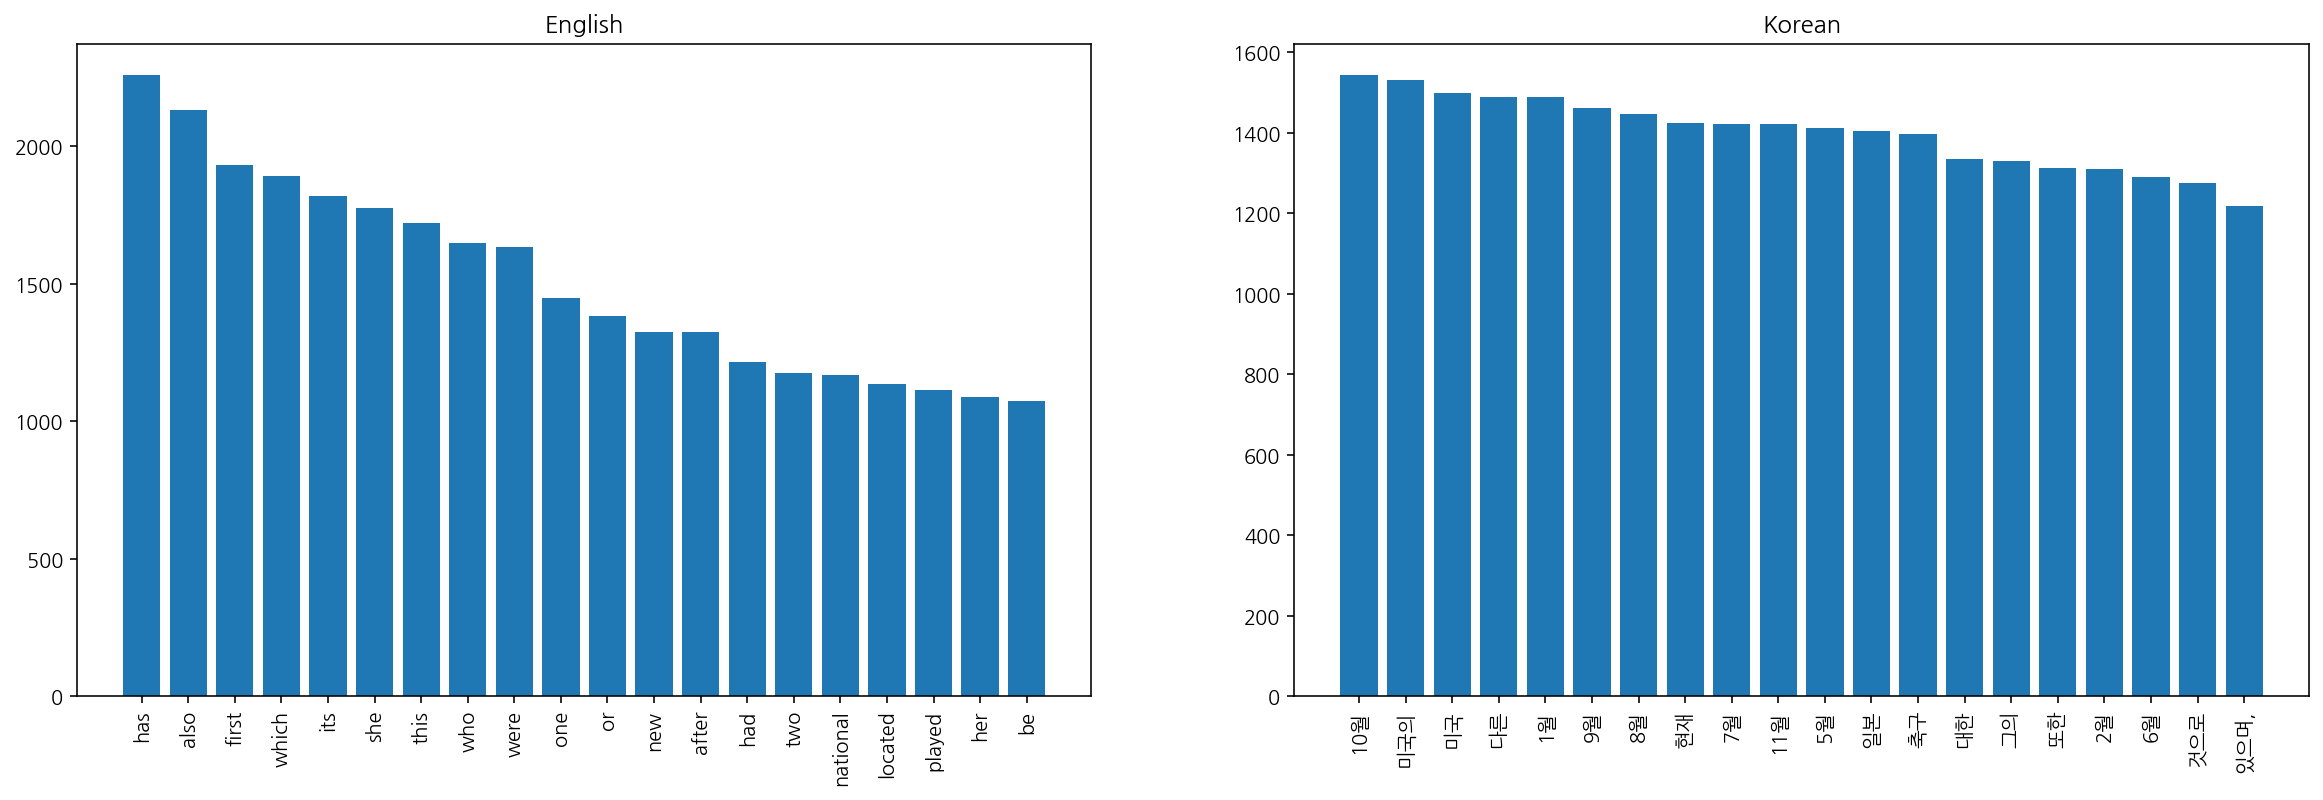

time: 533 ms (started: 2022-11-17 00:29:18 +00:00)


In [54]:
# Plot 20 most common words after removing top 20 common words
import matplotlib.pyplot as plt

most_common_en = counter_en.most_common()[20:40]
most_common_ko = counter_ko.most_common()[20:40]
most_common_bn = counter_bn.most_common()[20:40]


# Change the font to Korean font
# You may need to install the font first
plt.rcParams["font.family"] = "NanumGothic"

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.bar(range(20), [x[1] for x in most_common_en])
plt.xticks(range(20), [x[0] for x in most_common_en], rotation=90)
plt.title("English")

plt.subplot(1, 2, 2)
plt.bar(range(20), [x[1] for x in most_common_ko])
plt.xticks(range(20), [x[0] for x in most_common_ko], rotation=90)
plt.title("Korean")

plt.show()

## Most Frequent N-Grams

In [55]:
from sklearn.feature_extraction.text import CountVectorizer


def get_ngrams(data):
    # Initialize CountVectorizer
    vec = CountVectorizer(ngram_range=(2, 2))

    # Fit and transform
    ngram_counts = vec.fit_transform(data)

    # Get the n-gram counts
    ngram_counts = ngram_counts.sum(axis=0).A1

    # Create a DataFrame
    ngram_counts_df = pd.DataFrame(
        sorted(zip(vec.get_feature_names(), ngram_counts), key=lambda x: x[1], reverse=True),
        columns=["ngram", "count"],
    )
    return ngram_counts_df

time: 577 µs (started: 2022-11-17 00:29:19 +00:00)


In [56]:
ngram_counts_df_en = get_ngrams(words_en)
ngram_counts_df_en

,ngram,count
0,br gt,248
1,lt br,248
2,lt onlyinclude,95
3,onlyinclude gt,95
4,first class,88
...,...,...
8088,മക കൾ,1
8089,មស រឡ,1
8090,ヨーヘン パイパー戦記,1
8091,史記 volume,1


time: 2.31 s (started: 2022-11-17 00:29:19 +00:00)


In [57]:
ngram_counts_df_ko = get_ngrams(words_ko)
ngram_counts_df_ko

,ngram,count
0,기준 이다,182
1,lt br,180
2,br gt,177
3,사망하였다 사인,108
4,gt lt,76
...,...,...
50086,힘러 혼전성,1
50087,힘입어 2017년,1
50088,힘줄 tendon,1
50089,힘줄끈 chordae,1


time: 3.9 s (started: 2022-11-17 00:29:21 +00:00)


In [58]:
ngram_counts_df_bn = get_ngrams(words_bn)
ngram_counts_df_bn

,ngram,count
0,বর তম,816
1,বব লয,760
2,পর যন,720
3,উত তর,688
4,অভ নয,669
...,...,...
9806,ৰবৰ তন,1
9807,ஏற தழ,1
9808,சல கட,1
9809,தழ வல,1


time: 1.35 s (started: 2022-11-17 00:29:25 +00:00)


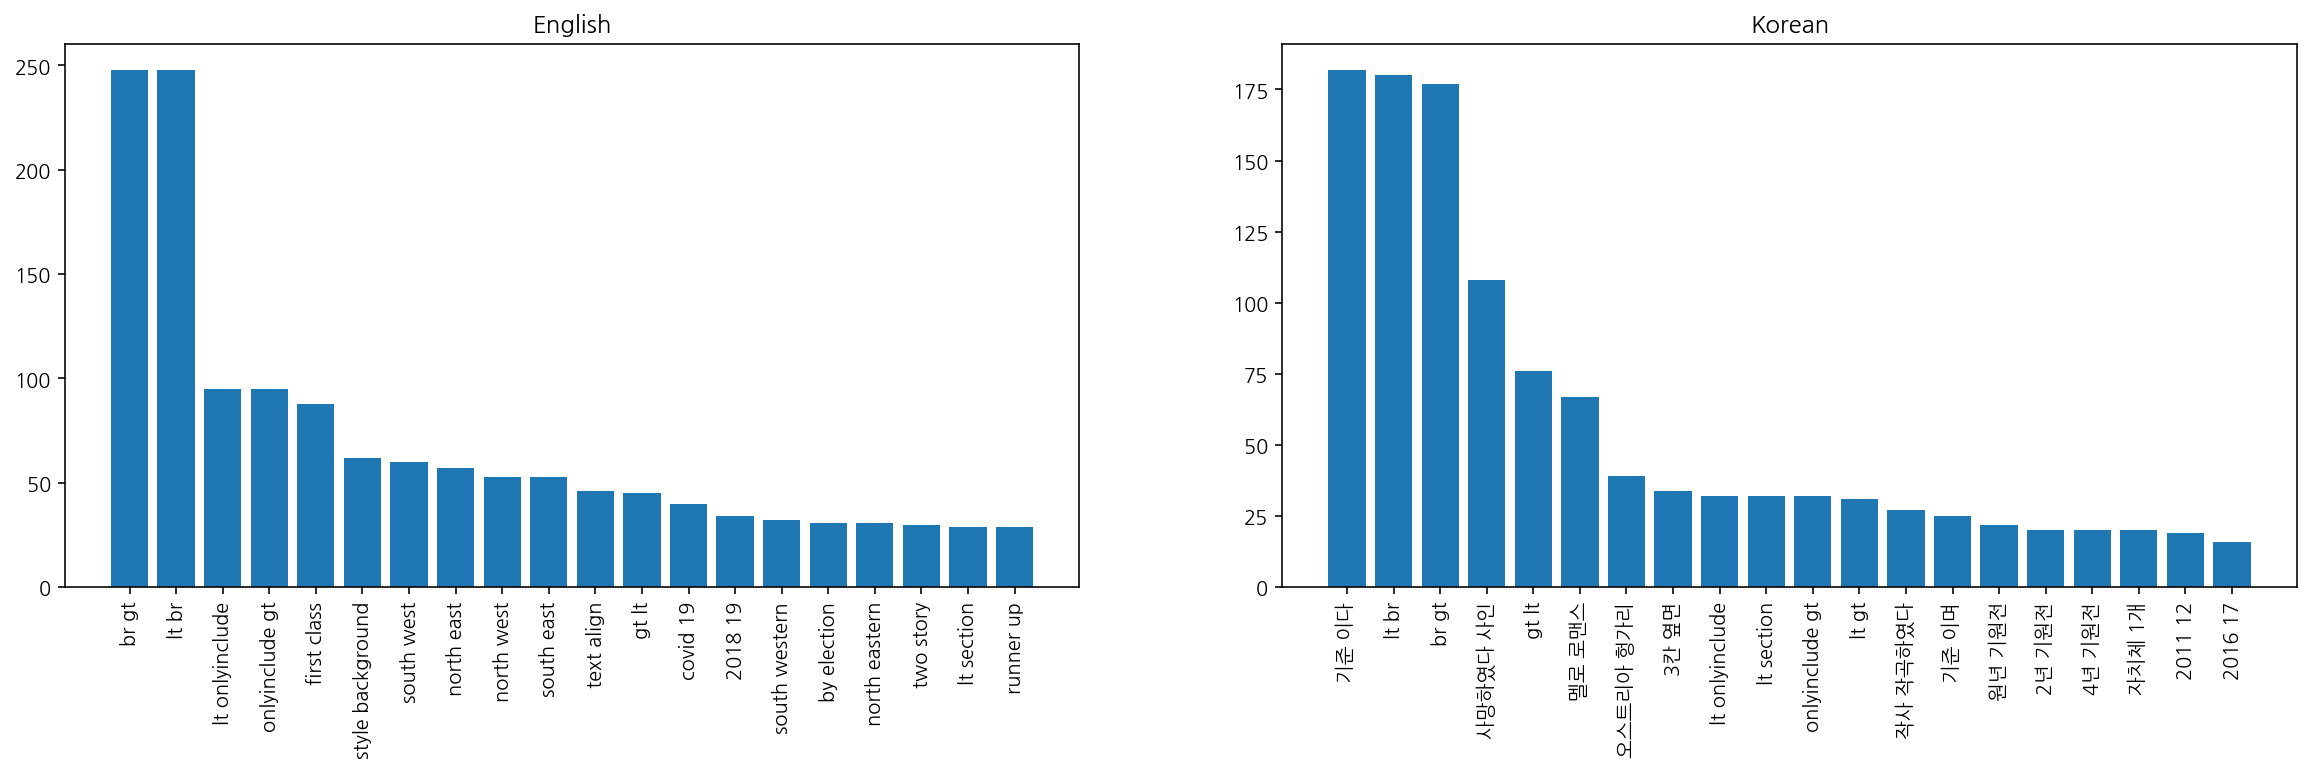

time: 376 ms (started: 2022-11-17 00:29:26 +00:00)


In [59]:
# plot 20 most common n-grams

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.bar(range(20), ngram_counts_df_en["count"][:20])
plt.xticks(range(20), ngram_counts_df_en["ngram"][:20], rotation=90)
plt.title("English")

plt.subplot(1, 2, 2)
plt.bar(range(20), ngram_counts_df_ko["count"][:20])
plt.xticks(range(20), ngram_counts_df_ko["ngram"][:20], rotation=90)
plt.title("Korean")

plt.show()

## Word Cloud

In [65]:
from ekorpkit.visualize.base import get_plot_font

fontname, fontpath = get_plot_font()
fontname, fontpath

('NanumGothic', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf')

time: 2.47 ms (started: 2022-11-17 00:33:05 +00:00)


In [70]:
# Function for generating word clouds
from wordcloud import WordCloud


def generate_wordcloud(
    data,
    title,
    width=400,
    height=200,
    max_words=150,
    figsize=(10, 5),
    colormap="Dark2",
    background_color="white",
):
    wc = WordCloud(
        width=width,
        height=height,
        max_words=max_words,
        colormap=colormap,
        background_color=background_color,
        font_path=fontpath,
    ).generate_from_frequencies(data)
    plt.figure(figsize=figsize)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=13)
    plt.show()

time: 677 µs (started: 2022-11-17 00:33:57 +00:00)


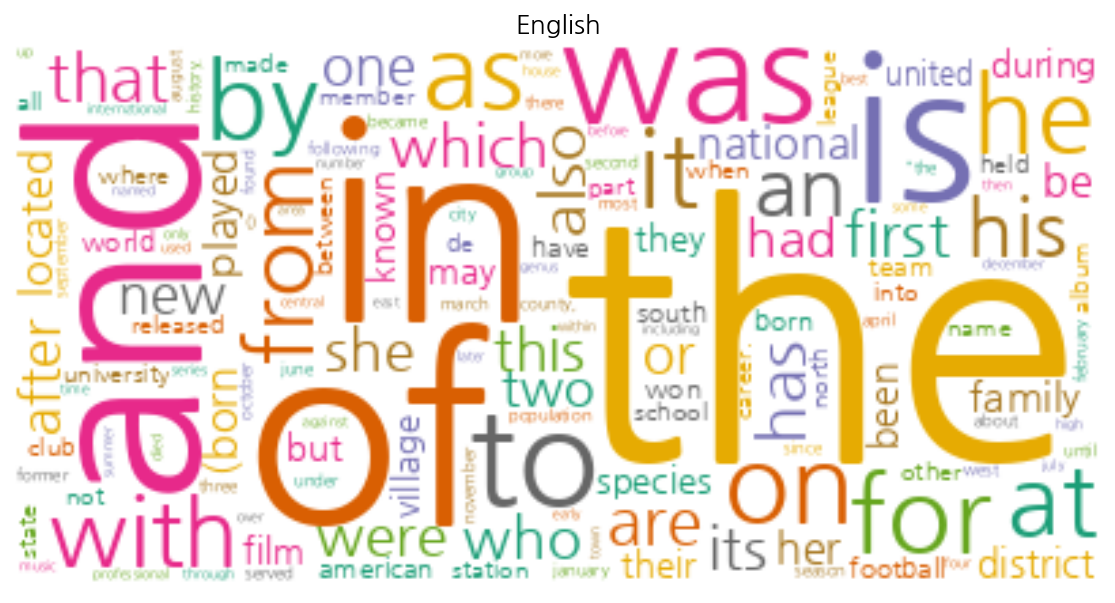

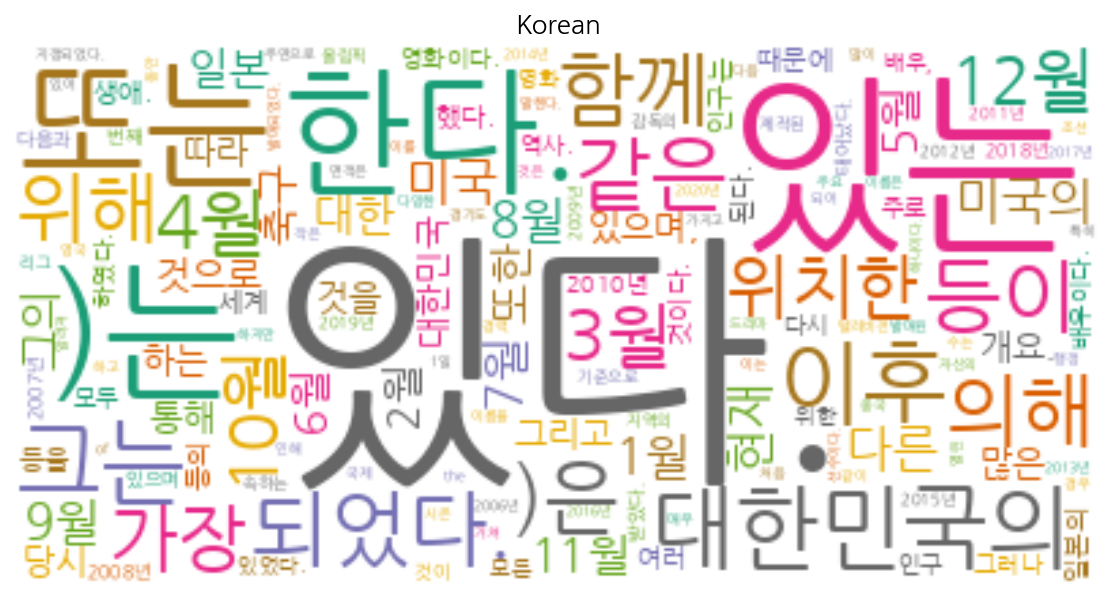

time: 1.31 s (started: 2022-11-17 00:34:26 +00:00)


In [73]:
# Generate word clouds

# English
generate_wordcloud(
    dict(counter_en.most_common()),
    "English",
)

# Korean
generate_wordcloud(
    dict(counter_ko.most_common()),
    "Korean",
)

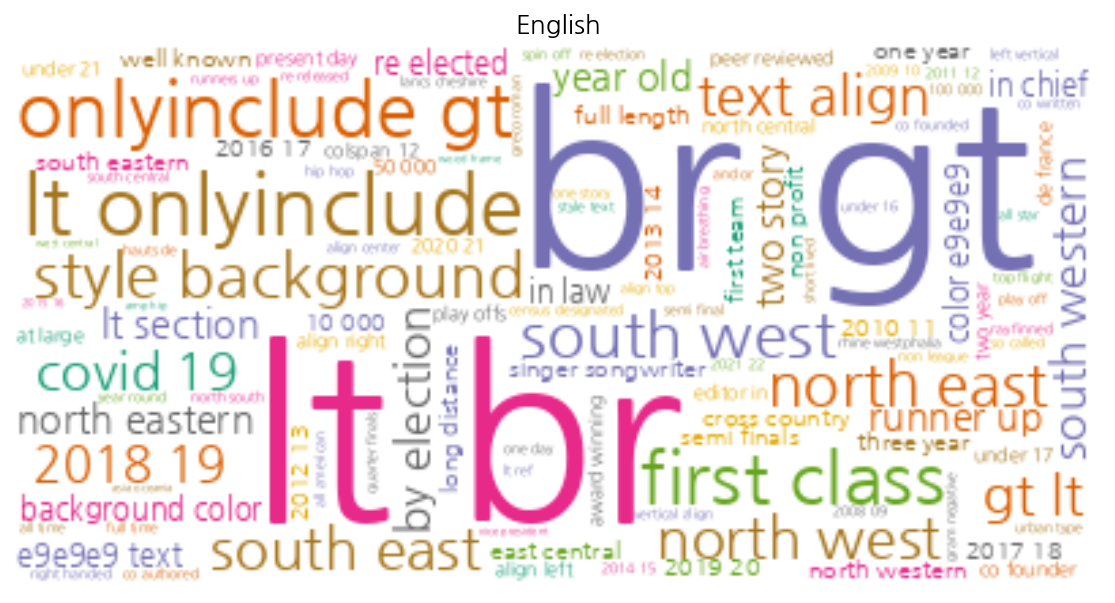

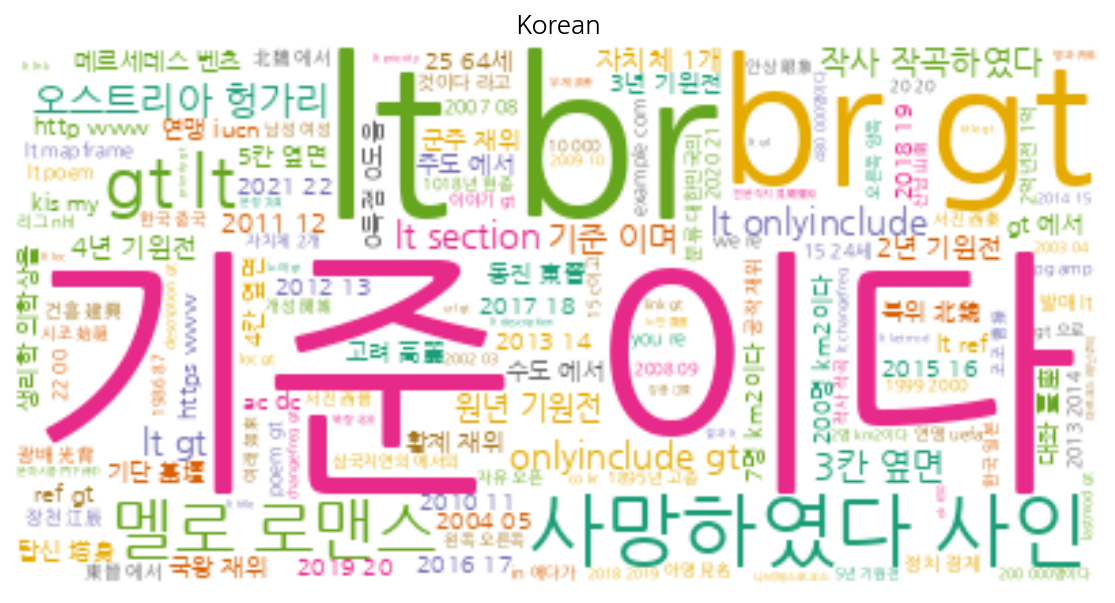

time: 1.27 s (started: 2022-11-17 00:34:06 +00:00)


In [72]:
# Generate word clouds for n-grams

# English
generate_wordcloud(
    dict(ngram_counts_df_en.set_index("ngram")["count"]),
    "English",
)

# Korean
generate_wordcloud(
    dict(ngram_counts_df_ko.set_index("ngram")["count"]),
    "Korean",
)